# EDA and Feature Engineering
This notebook demonstaratesthe EDA and feature engineering done for the project. 

## Contents
* [Import libraries and load datasets](#chapter1)
    * [Import libraries](#chapter1_1)
    * [Load datasets and review](#chapter1_2)
* [EDA](#chapter2)
    * [Data Availability](#chapter2_1)
    * [Target Variable](#chapter2_2)
    * [NumMosquitos,_Species](#chapter2_3)
    * [Latitude and Longitude](#chapter2_4)
    * [Spray and Trap Locations](#chapter2_5)
    * [Weather Data](#chapter2_6)
* [Feature Engineering & Feature Selection](#chapter3)
    * [Parse Date](#chapter3_1)
    * [Make Train and Test Columns Same](#chapter3_2)
    * [Correlation of Features to Target](#chapter3_3)


## Import libraries and load datasets <a class="anchor" id="chapter1"></a>

### Import Libraries

In [2]:
#Import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set_style('darkgrid')

### Load datasets and review  <a class="anchor" id="chapter1_2"></a>

In [2]:
# loading data from train.csv file.
train = pd.read_csv('../dataset/train_clean.csv')

In [3]:
# loading data from test.csv file.
test = pd.read_csv('../dataset/test_clean.csv')

In [3]:
# loading data from weather.csv file
weather = pd.read_csv('../dataset/weather_cleaned.csv')

In [5]:
# loading data from spray.csv files provided
spray = pd.read_csv('../dataset/spray_cleaned.csv')

In [6]:
#Check train dtypes and columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    9693 non-null   object 
 1   Species                 9693 non-null   object 
 2   Street                  9693 non-null   object 
 3   Trap                    9693 non-null   object 
 4   Latitude                9693 non-null   float64
 5   Longitude               9693 non-null   float64
 6   NumMosquitos            9693 non-null   int64  
 7   WnvPresent              9693 non-null   int64  
 8   CULEX ERRATICUS         9693 non-null   int64  
 9   CULEX PIPIENS           9693 non-null   int64  
 10  CULEX PIPIENS/RESTUANS  9693 non-null   int64  
 11  CULEX RESTUANS          9693 non-null   int64  
 12  CULEX SALINARIUS        9693 non-null   int64  
 13  CULEX TARSALIS          9693 non-null   int64  
 14  CULEX TERRITANS         9693 non-null   

In [7]:
#Check test dtypes and columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    116293 non-null  object 
 1   Street                  116293 non-null  object 
 2   Trap                    116293 non-null  object 
 3   Latitude                116293 non-null  float64
 4   Longitude               116293 non-null  float64
 5   CULEX ERRATICUS         116293 non-null  int64  
 6   CULEX PIPIENS           116293 non-null  int64  
 7   CULEX PIPIENS/RESTUANS  116293 non-null  int64  
 8   CULEX RESTUANS          116293 non-null  int64  
 9   CULEX SALINARIUS        116293 non-null  int64  
 10  CULEX TARSALIS          116293 non-null  int64  
 11  CULEX TERRITANS         116293 non-null  int64  
 12  UNSPECIFIED CULEX       116293 non-null  int64  
 13  Station                 116293 non-null  int64  
dtypes: float64(2), int64

In [8]:
#Convert date to datetime dtype for all the DataFrame.
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])
spray['Date'] = pd.to_datetime(spray['Date'])

## EDA <a class="anchor" id="chapter2"></a>

#### Observations and Insights

1. Data availability:<br>
    a. Train data: 2007, 2009, 2011 and 2013<br>
    b. Test data: 2008, 2010, 2012 and 2014<br>
    c. Spray data: 2011 and 2013<br>
    d. Weather data: 2007 - 2014<br>
    
2. Significant increase in number of spray locations in 2013 vs. 2011
3. NumMosquitos vs WnvPresent shows that the more mosquitos there are in the traps, the more chances to find a mosquito with WNV
4. Out of total 6 species of mosquitoes only 2 species are seen to be carriers of WNV virus
5. Looking at traps with WNV presence vs. sprays, clusters can be identified where sprayed. For some reason, central area did not have any spray locations
6. More WNV cases were observed on the east and north sides of the city than west and south.
7. 2009 and 2011 are the years where overall WNV count was lower. Need to dig deeper into the reason why. Probably weather conditions were not favorable for the mosquitoes in these years.
8. Only 6 out of 134 traps have > 10 WNV positive
9. After identifying top traps and trying to plot sprays over these traps explained the spraying locations much better. 
10. WNV frequency is proportional to the temperature and inversely proportional to the precipitation.

### Data availability<a class="anchor" id="chapter2_1"></a>

**Train data available for 2007, 2009, 2011 and 2013**

In [9]:
train.groupby(train.Date.dt.year).agg({"Date":"count"}).rename(columns={"Date":"Count"}).reset_index()

Date  Count
0  2007   3231
1  2009   2139
2  2011   2000
3  2013   2323

**Test data available for 2007, 2009, 2011 and 2013**

In [10]:
test.groupby(test.Date.dt.year).agg({"Date":"count"}).rename(columns={"Date":"Count"}).reset_index()

Date  Count
0  2008  30498
1  2010  36557
2  2012  27115
3  2014  22123

**Spray data available for 2011 and 2013**

In [11]:
spray.groupby(spray.Date.dt.year).agg({"Date":"count"}).rename(columns={"Date":"Count"}).reset_index()

Date  Count
0  2011   1668
1  2013  12626

**Weather data available for 2007 to 2014**

In [12]:
weather.groupby(weather.Date.dt.year).agg({"Date":"count"}).rename(columns={"Date":"Count"}).reset_index()

Date  Count
0  2007    368
1  2008    368
2  2009    368
3  2010    368
4  2011    368
5  2012    368
6  2013    368
7  2014    368

### Target Variable<a class="anchor" id="chapter2_2"></a>

Our train dataset is an unbalanced set with 95% of rows stating information with no virus present

In [13]:
# examining our target variable
train.WnvPresent.value_counts(normalize  = True)

0    0.948107
1    0.051893
Name: WnvPresent, dtype: float64

###  NumMosquitos, Species<a class="anchor" id="chapter2_3"></a>

#### NumMosquitos vs WnvPresent

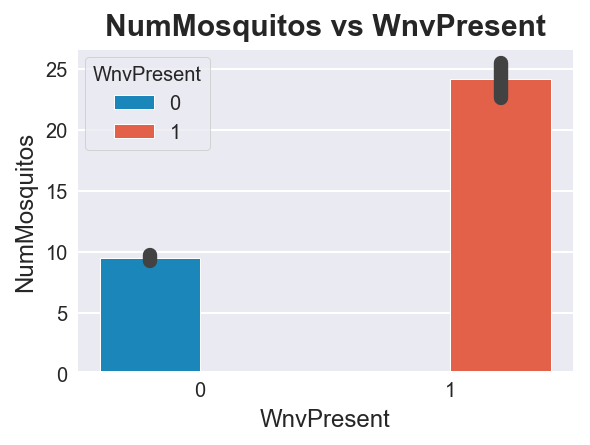

In [14]:
plt.subplots(figsize=(4,3))
sns.barplot('WnvPresent','NumMosquitos',data=train,hue='WnvPresent')
plt.title('NumMosquitos vs WnvPresent', fontsize = 15, weight = 'bold');

Expectedly, the data shows that the more mosquitos there are in the traps, the more chances to find a mosquito with WNV.<br>
Although it's a strong feature it is questionable whether we would be able to use it for prediction. The feature might be "target-linked" meaning that when we deploy our model to predict WNV, we wouldn't have the number of mosquitos because it is being determind at the site along side with the detection of the virus (which we are trying to predict in the first place), in this case we might need to predict the number of mosquitos by itself.

Assumption: For this project's purposes let's assume for now that the 'NumMosquitos' feature IS NOT 'target-linked' and is an integral part of the features provided by Chicago Municipality to predict WNV occurences.

#### WNV count by Mosquito Species

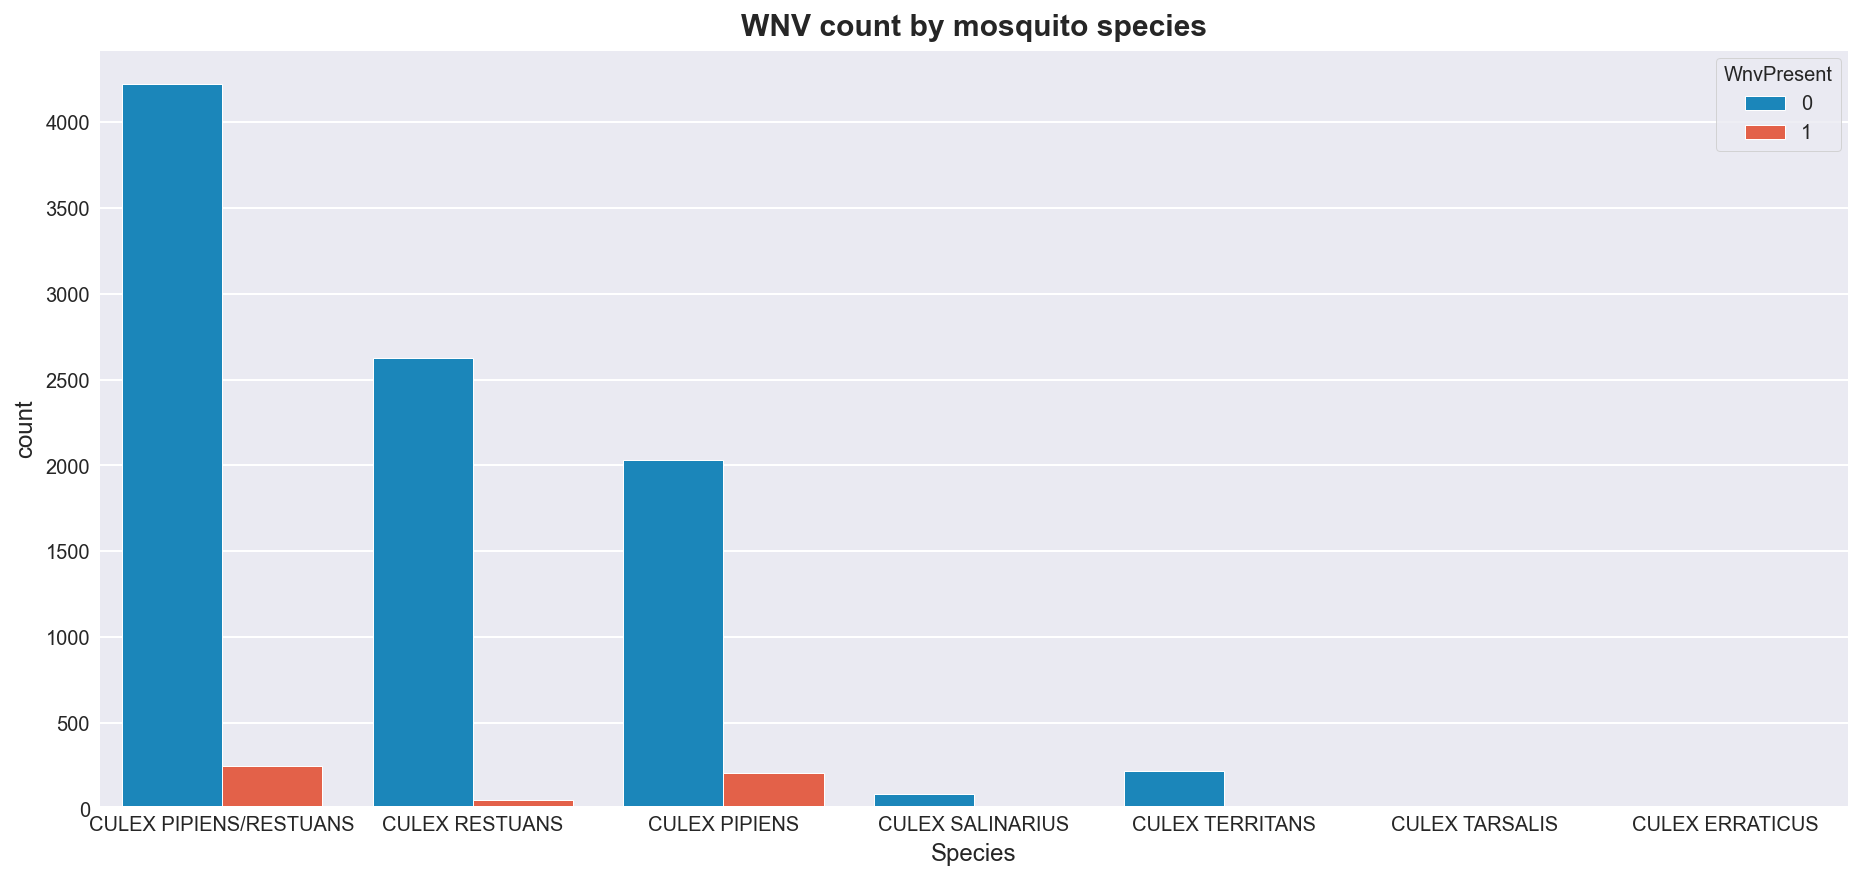

In [15]:
plt.subplots(figsize=(14,7))
sns.countplot('Species',data=train,hue='WnvPresent')
plt.title('WNV count by mosquito species', fontsize = 15, weight = 'bold');

We can see a relationship between species found in traps and the appearance of the virus. There are 6 different species (the 1st is traps with combination of 2 different species). Traps that have the virus are in orange, those who don’t are in blue.<br>
Seems that only 2 species are common (‘Culex Pipiens’ and ‘Culex Restuans’), and 1 specie has high number of WNV – ‘Culex Pipiens’ with relative portion of WNV ~=10%

#### Species with Positive WNV

In [16]:
#Creating a column 'year' by extracting year from column 'Date'
train['year'] = train.Date.dt.year
test['year'] = test.Date.dt.year

In [17]:
# creating a df with rows WNV is present
df = train[train.WnvPresent == 1][['Trap','Date','Species', 'Latitude','Longitude','NumMosquitos','WnvPresent','year']]
df.head()

Trap       Date                 Species   Latitude  Longitude  \
546  T215 2007-07-18  CULEX PIPIENS/RESTUANS  41.686398 -87.531635   
589  T115 2007-07-25  CULEX PIPIENS/RESTUANS  41.673408 -87.599862   
592  T115 2007-07-25           CULEX PIPIENS  41.673408 -87.599862   
697  T002 2007-08-01  CULEX PIPIENS/RESTUANS  41.954690 -87.800991   
698  T002 2007-08-01  CULEX PIPIENS/RESTUANS  41.954690 -87.800991   

     NumMosquitos  WnvPresent  year  
546            50           1  2007  
589            50           1  2007  
592            50           1  2007  
697            50           1  2007  
698            21           1  2007

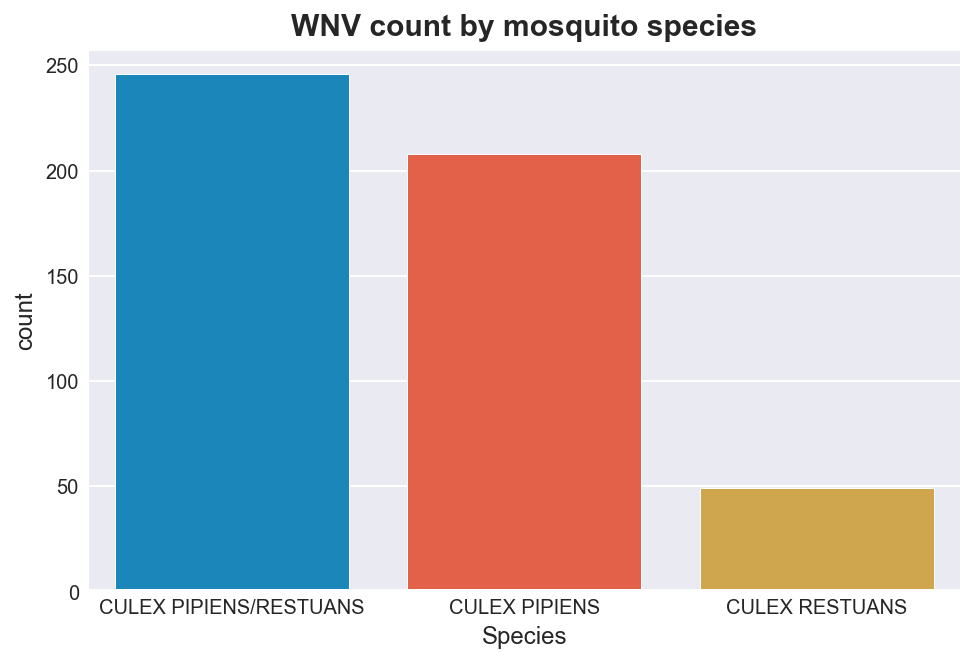

In [18]:
plt.subplots(figsize=(7,5))
#bar_width = 0.35
sns.countplot('Species',data=df)
plt.title('WNV count by mosquito species', fontsize = 15, weight = 'bold');

#### Looking at the distribution of species over the years for both WNV presence and otherwise

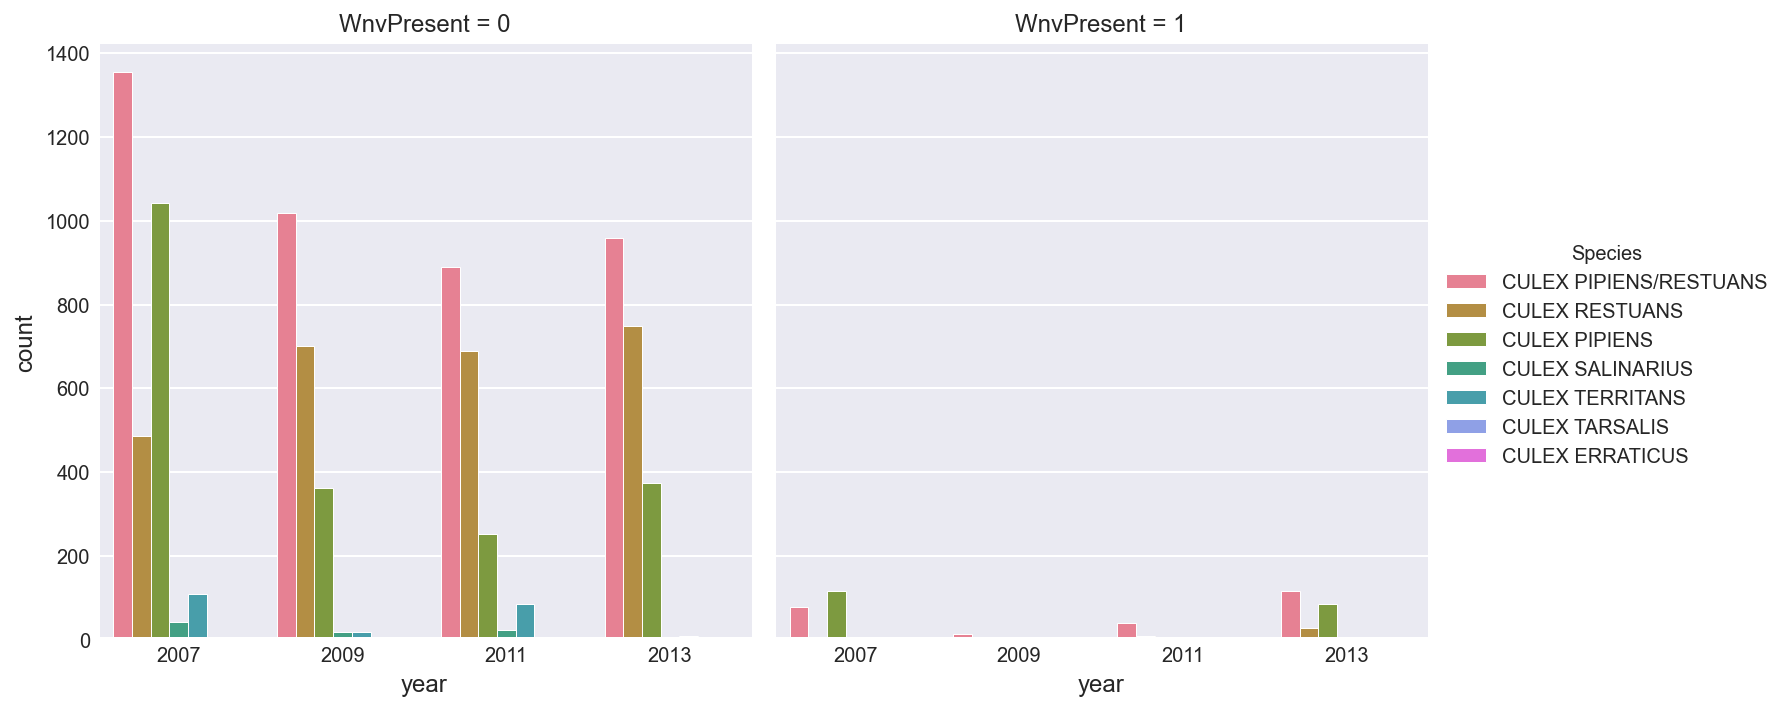

In [19]:
# looking at the distribution of species over the years for both WNV presence and otherwise
sns.catplot(data=train,x='year',hue='Species', col = 'WnvPresent', kind = 'count', palette = 'husl');

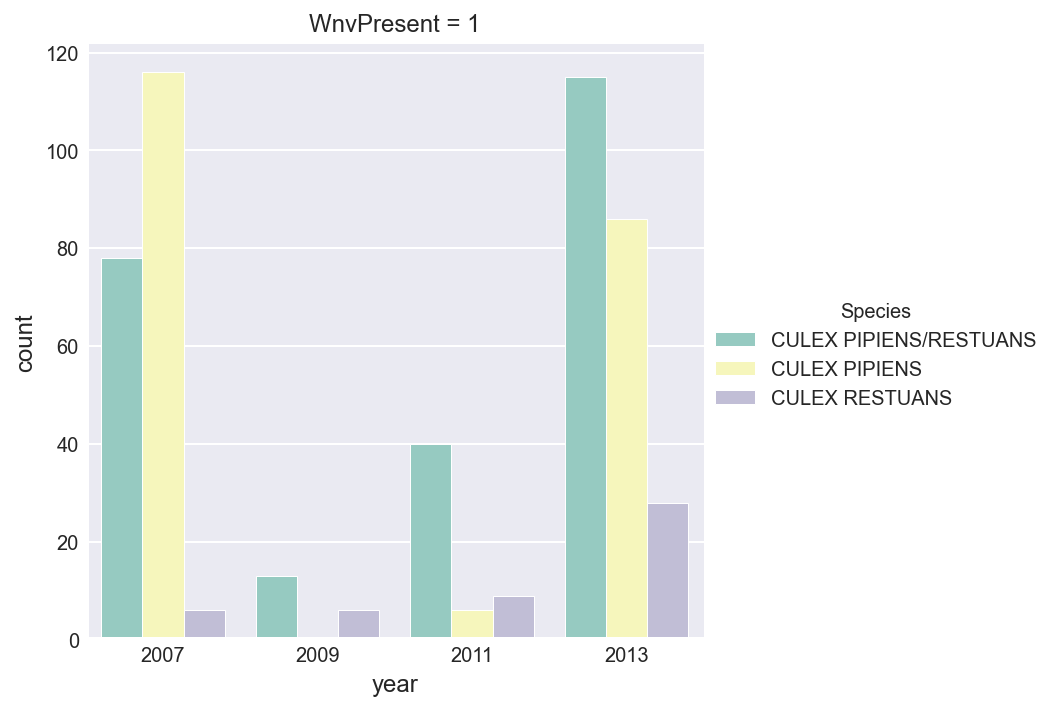

In [20]:
# taking a closer look at the virus presence in species over the years
sns.catplot(data=df,x='year',hue='Species', col = 'WnvPresent', kind = 'count', palette = 'Set3');

### Latitude and Longitude<a class="anchor" id="chapter2_4"></a>

#### Latitude

In [21]:
latitude_list = []
for i in set(train.Latitude.values):
    latitude_list.append(train[train.Latitude == i]['WnvPresent'].mean())

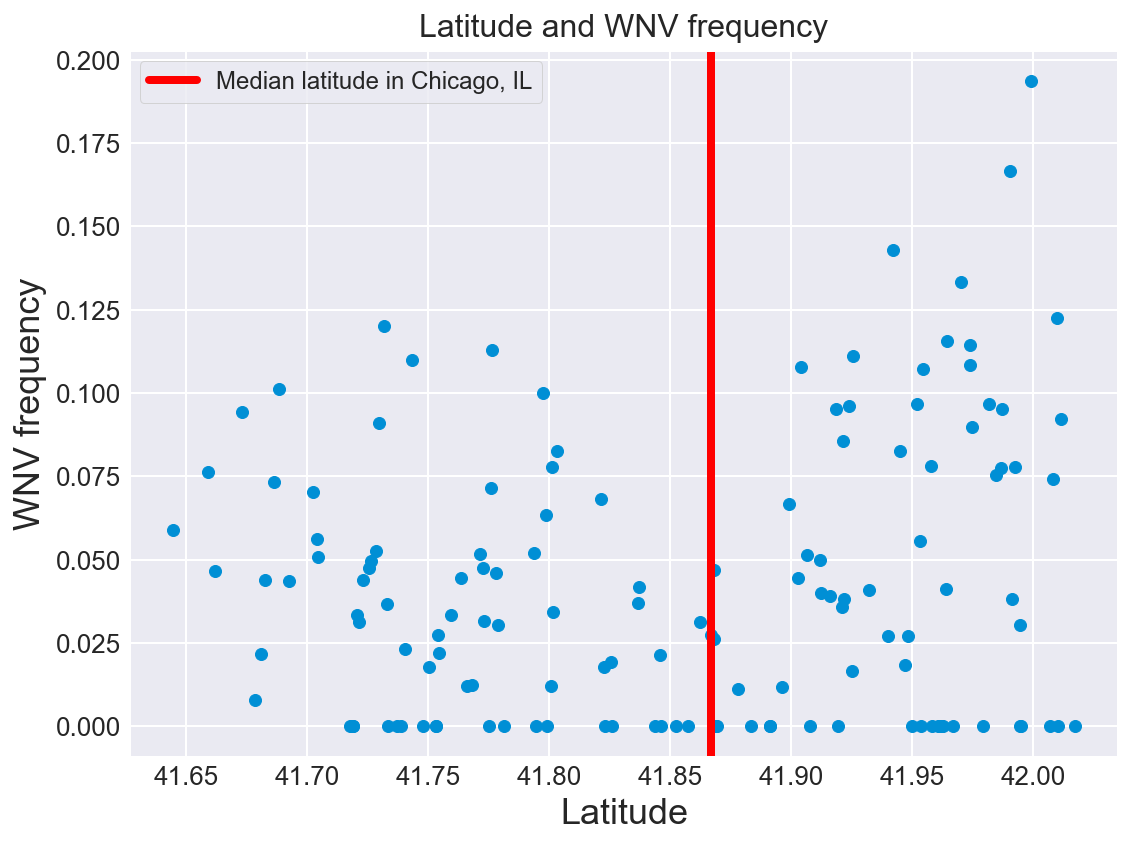

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(list(set(train.Latitude.values)), latitude_list)
plt.axvline(train.Latitude.median(),  color='red', label='Median latitude in Chicago, IL')
plt.xlabel('Latitude', size=18)
plt.ylabel('WNV frequency', size=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Latitude and WNV frequency', size=16)
plt.legend(fontsize=12, loc=2)
plt.tight_layout()

More cases were on the northern side of the city; the bimodal appearance of the distribution is an artifact of the 41.85 latitude being the urban center of the city.

#### Longitude

In [23]:
longitude_list = []
for i in set(train.Longitude.values):
    longitude_list.append(train[train.Longitude == i]['WnvPresent'].mean())

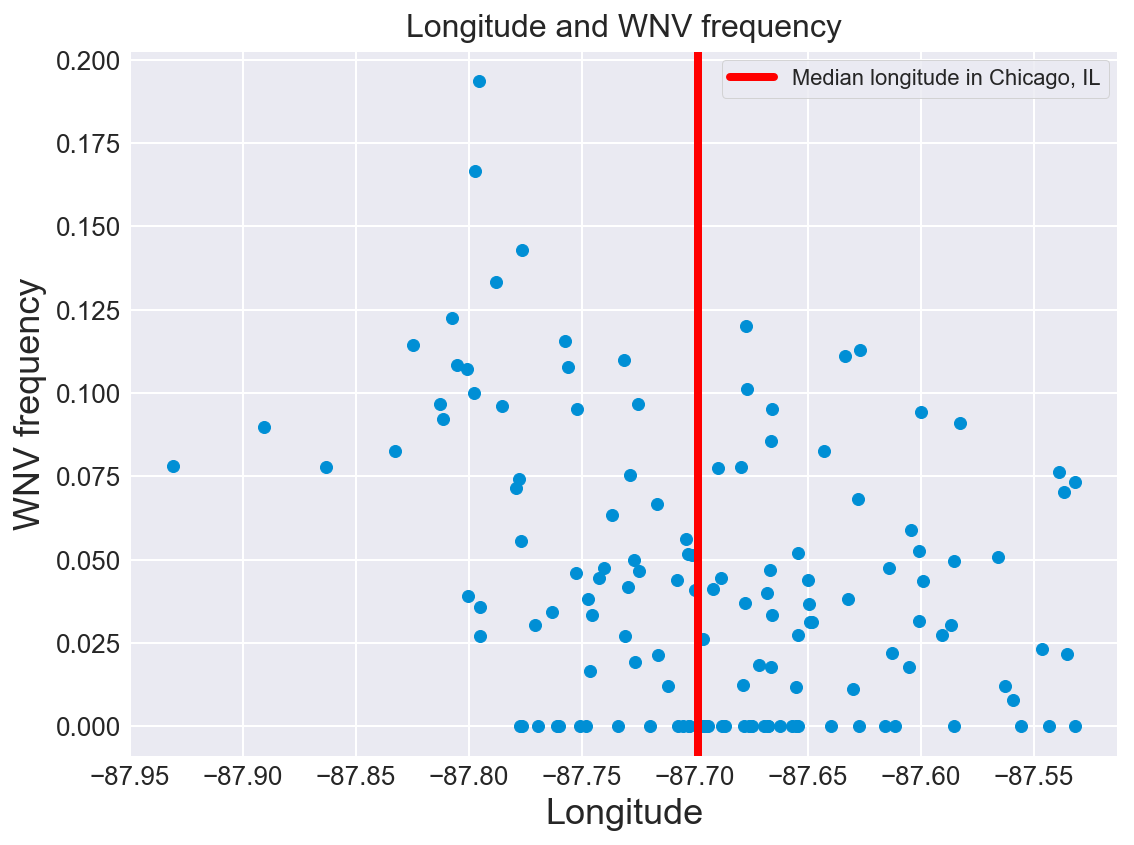

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(list(set(train.Longitude.values)), longitude_list)
plt.axvline(train.Longitude.median(),  color='red', label='Median longitude in Chicago, IL')
plt.xlabel('Longitude', size=18)
plt.ylabel('WNV frequency', size=18)
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Longitude and WNV frequency', size=16)
plt.legend(fontsize=11, loc=1)
plt.tight_layout()

More cases were on the eastern side of the city

### Spray and Trap Locations<a class="anchor" id="chapter2_5"></a>

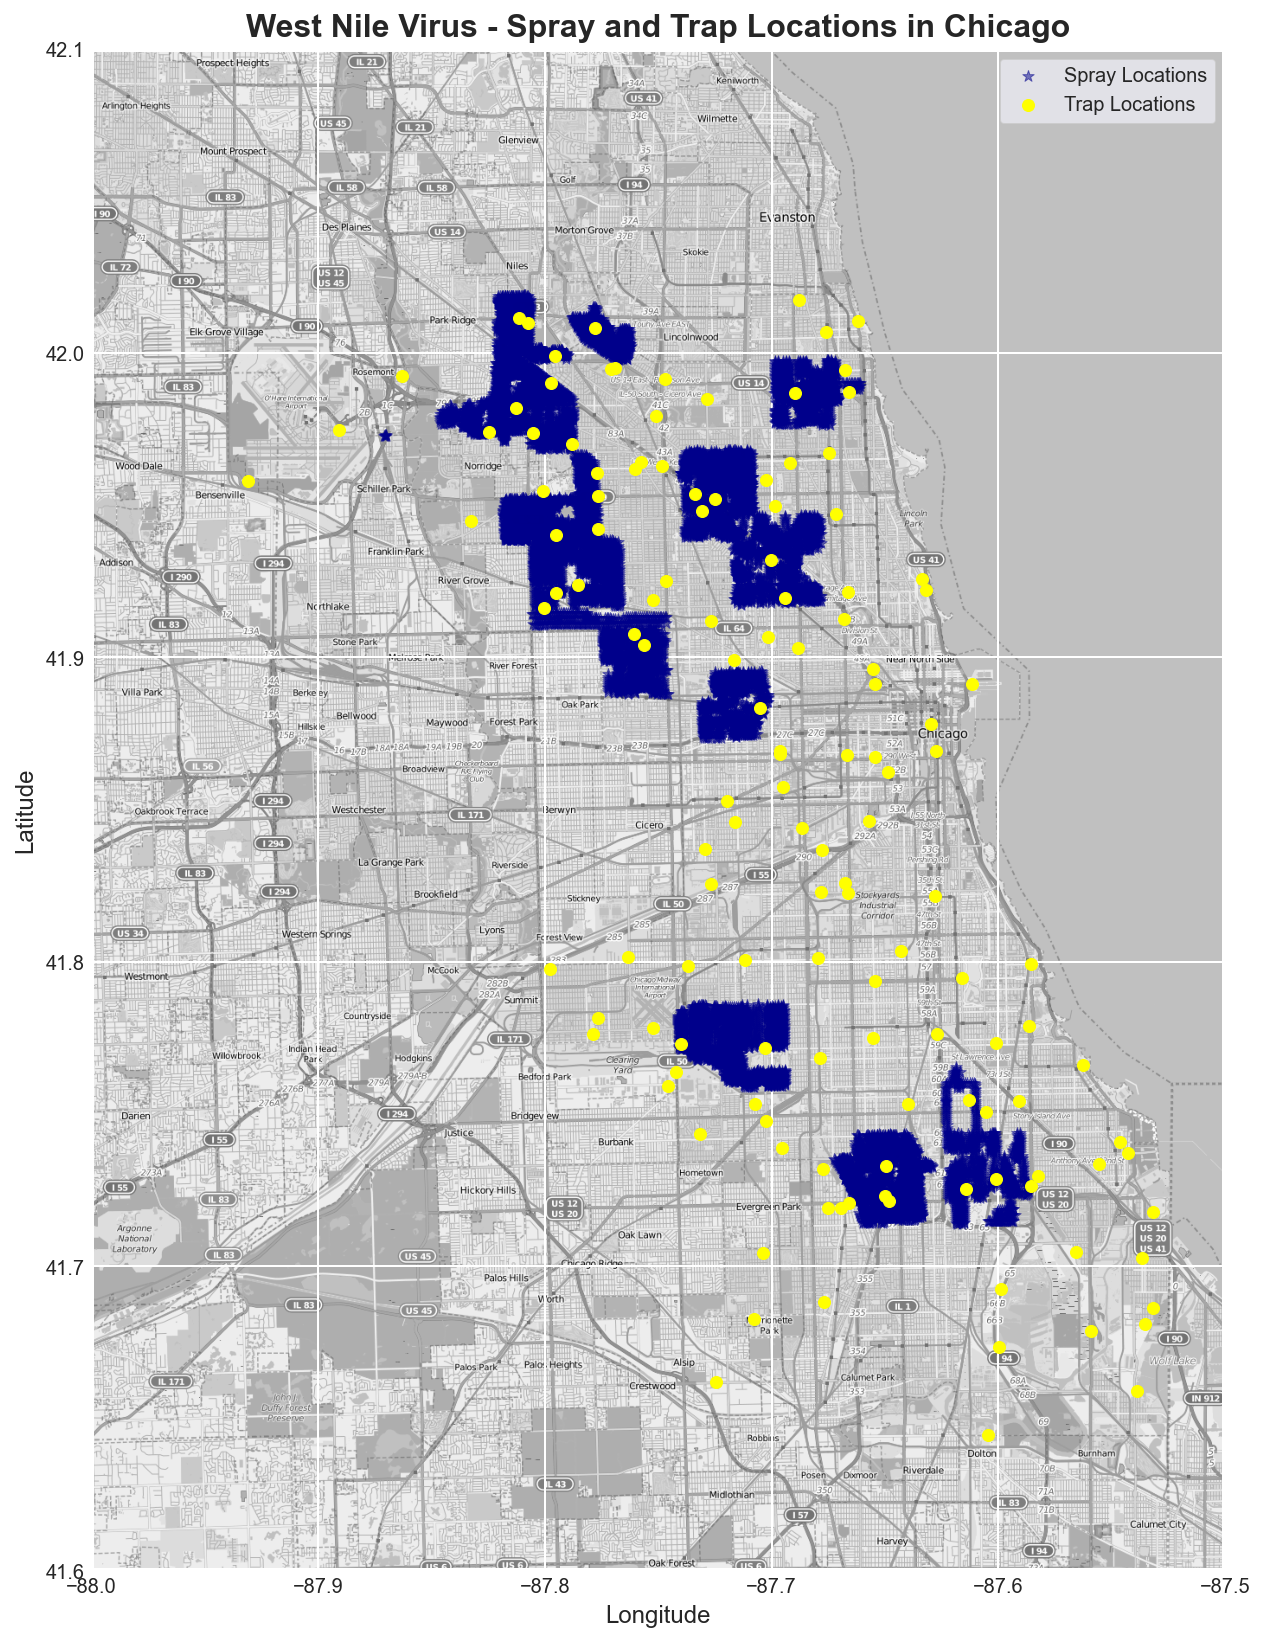

In [25]:
# plotting spray and trap locations
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

# plot map
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

# spray locations
sprays = spray[['Longitude', 'Latitude']].drop_duplicates()
sprays = sprays[sprays['Latitude'] < 42.3]  # excluding outliers
plt.scatter(sprays['Longitude'], sprays['Latitude'], marker='*', color='darkblue',alpha=.5, label='Spray Locations');

# trap locations
traps = train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='o', label='Trap Locations', color = 'yellow');


plt.title('West Nile Virus - Spray and Trap Locations in Chicago', weight = 'bold', size = 16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(frameon=1);

Trap locations are rather scattered when compared to spray locations.<br>
- Since spray location data is only available for 2 years - 2011 and 2013 and Trap locations are available for 4 years - 2007, 2009, 2011 and 2013.<br> 
- Tried to map 2011 and 2013 traps and spray locations to see if there are any linkages/ variations.<br>
- Also tried to filter traps with WNV presence and plot the spray info by year (shown in the below map view)

In [26]:
spray.Date.dt.year.value_counts().sort_values()

2011     1668
2013    12626
Name: Date, dtype: int64

In [27]:
train.groupby('Trap')['year'].value_counts()

Trap  year
T001  2007     15
T002  2007     48
      2013     47
      2009     43
      2011     30
             ... 
T900  2011    206
      2009    198
T903  2011     61
      2009     50
      2013     17
Name: year, Length: 343, dtype: int64

#### Plotting spray and trap location by year 2011 and 2013

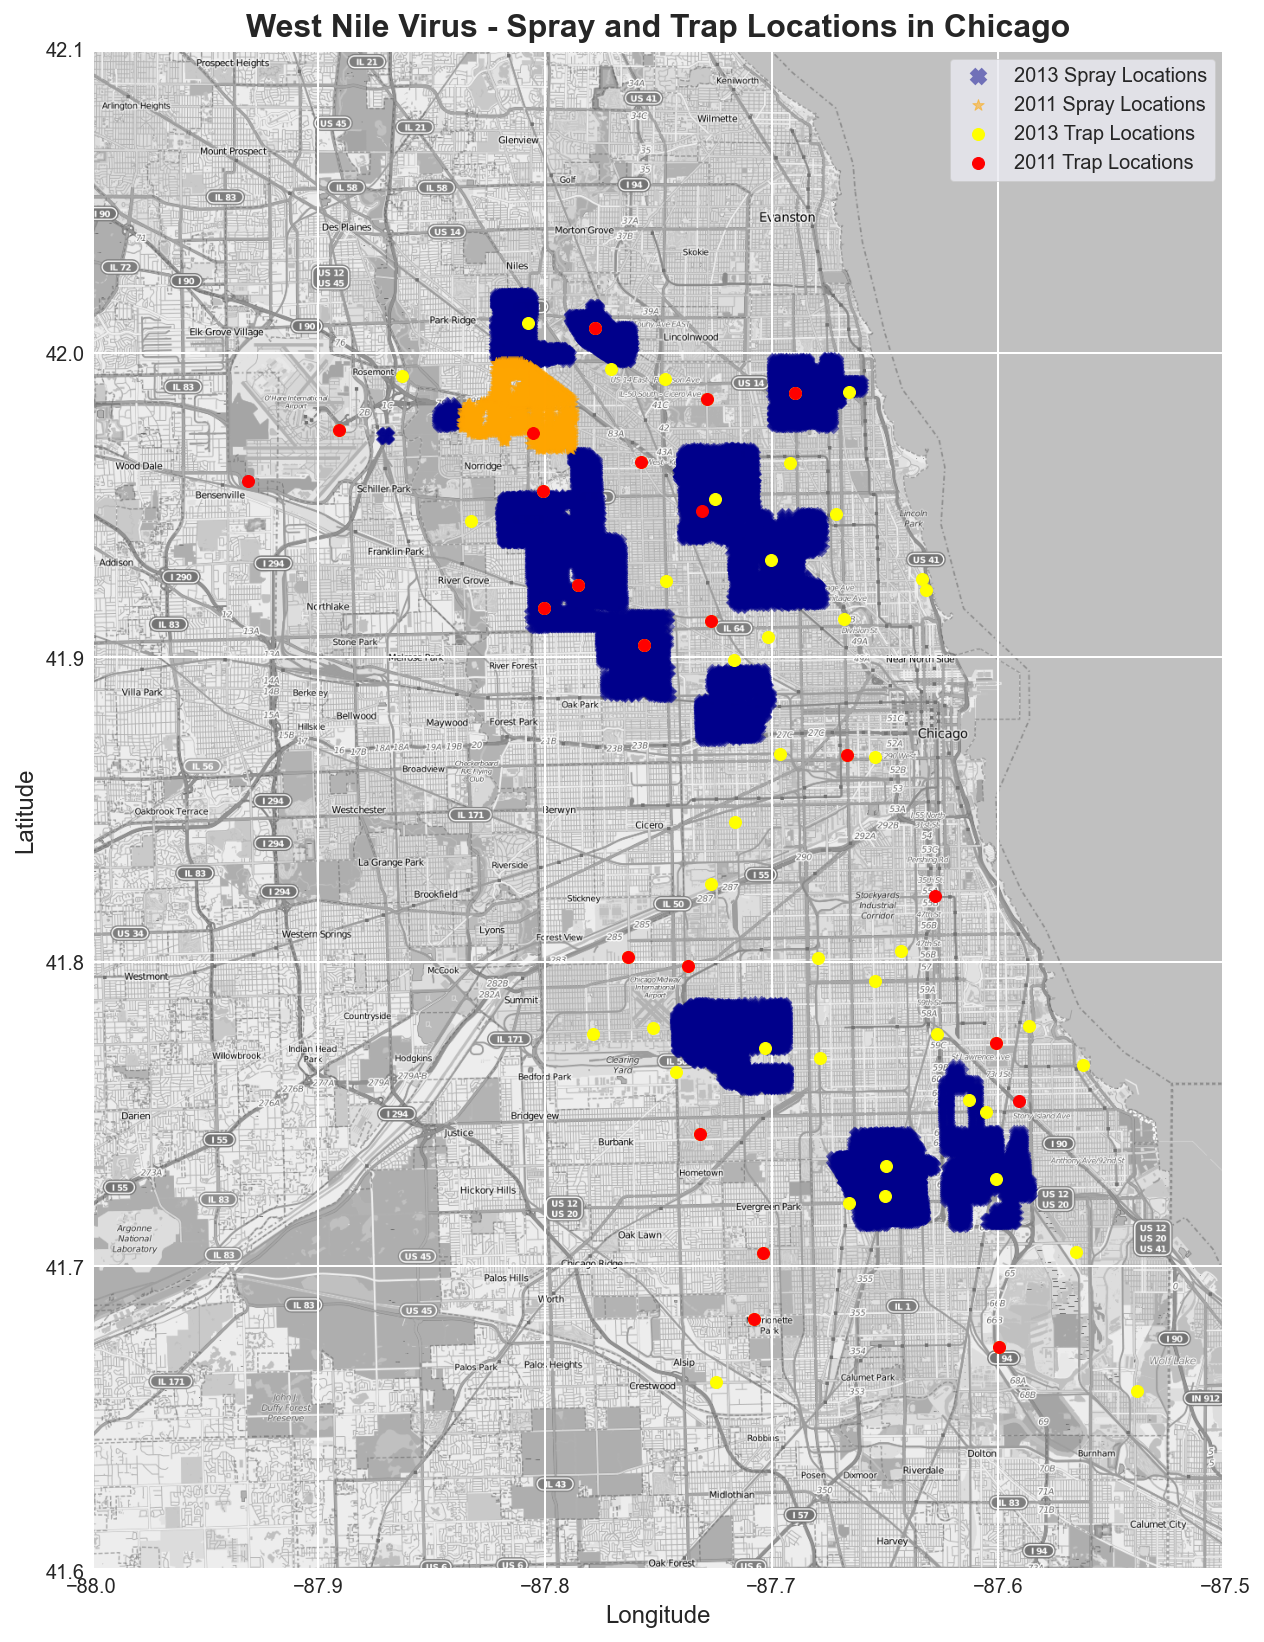

In [28]:
# plotting spray and trap location by year

# plot map
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

df.Date = pd.to_datetime(df.Date)

# spray locations
sprays_2013 = spray[spray.Date.dt.year == 2013][['Longitude', 'Latitude']].drop_duplicates()
sprays_2011 = spray[spray.Date.dt.year == 2011][['Longitude', 'Latitude']].drop_duplicates()
sprays_2013 = sprays_2013[sprays_2013['Latitude'] < 42.3]  # excluding outliers
sprays_2011 = sprays_2011[sprays_2011['Latitude'] < 42.3]  # excluding outliers
plt.scatter(sprays_2013['Longitude'], sprays_2013['Latitude'], marker='x', color='darkblue',alpha=.5, label='2013 Spray Locations');
plt.scatter(sprays_2011['Longitude'], sprays_2011['Latitude'], marker='*', color='orange',alpha=.5, label='2011 Spray Locations');

# trap locations
traps_2013 = df[df.Date.dt.year == 2013][['Trap','Longitude', 'Latitude', 'WnvPresent']]
traps_2011 = df[df.Date.dt.year == 2011][['Trap','Longitude', 'Latitude', 'WnvPresent']]
locations_13 = traps_2013[['Longitude', 'Latitude']].drop_duplicates().values
locations_11 = traps_2011[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations_13[:,0], locations_13[:,1], marker='o', label='2013 Trap Locations', color = 'yellow');
plt.scatter(locations_11[:,0], locations_11[:,1], marker='o', label='2011 Trap Locations', color = 'red');

plt.title('West Nile Virus - Spray and Trap Locations in Chicago', weight = 'bold', size = 16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(frameon=1);

#### Plotting Spray and Top Trap Locations

In [29]:
df[['Trap','WnvPresent']].groupby('Trap').agg('sum').sort_values(by='WnvPresent',ascending = False)

WnvPresent
Trap            
T900          55
T115          20
T002          18
T003          14
T225          11
...          ...
T085           1
T142           1
T145           1
T156           1
T091           1

[97 rows x 1 columns]

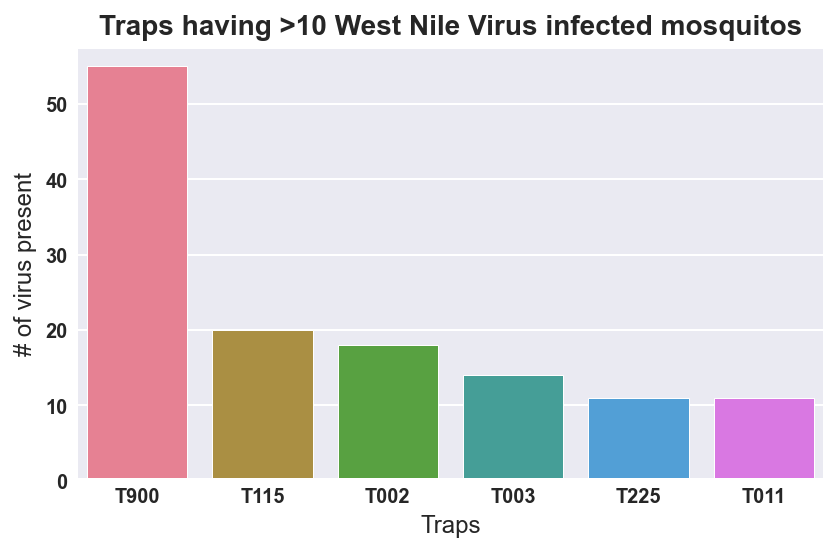

In [30]:

# looking at top traps with virus presence
virus_by_trap = df[['Trap','WnvPresent']].groupby('Trap').agg('sum')
virus_by_trap.sort_values(by='WnvPresent', ascending=False, inplace=True)
virus_by_trap.reset_index(inplace=True)
top_traps =virus_by_trap[virus_by_trap['WnvPresent']>10]

plt.figure(figsize=(6,4))
sns.barplot(data=top_traps, x='Trap', y='WnvPresent', palette = 'husl') #, hue='year')
plt.title("Traps having >10 West Nile Virus infected mosquitos", fontsize=14, weight = 'bold')
plt.xticks(fontsize= 10, weight = 'bold')
plt.yticks(fontsize= 10, weight = 'bold')
plt.xlabel('Traps', fontsize = 12)
plt.ylabel('# of virus present', fontsize = 12);
plt.show()

In [31]:
trap_coords = df[['Trap','Latitude','Longitude']].drop_duplicates()
top_traps=pd.merge(top_traps, trap_coords,  how='left', left_on=['Trap'], right_on = ['Trap'])
top_traps

Trap  WnvPresent   Latitude  Longitude
0  T900          55  41.974689 -87.890615
1  T115          20  41.673408 -87.599862
2  T002          18  41.954690 -87.800991
3  T003          14  41.964242 -87.757639
4  T225          11  41.743402 -87.731435
5  T011          11  41.944869 -87.832763

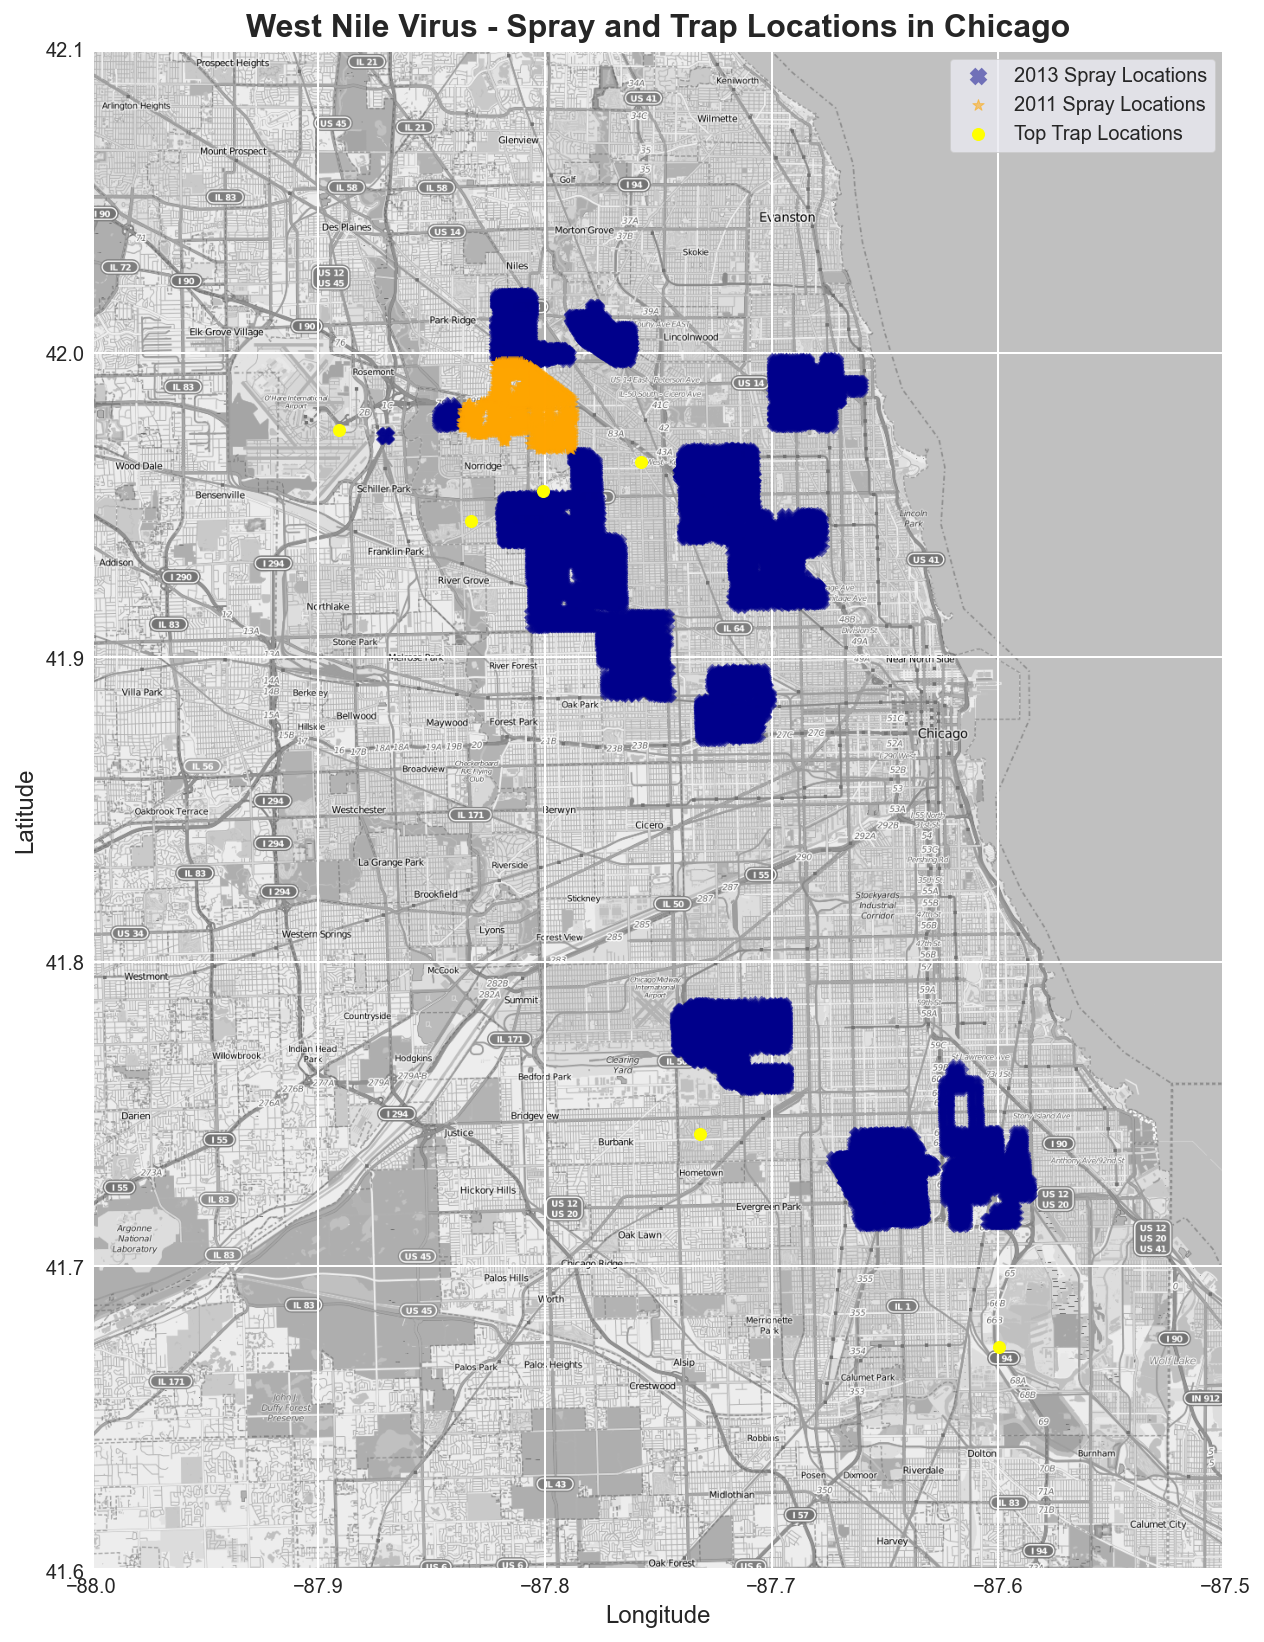

In [32]:
# plotting spray and top trap locations by year

# plot map
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

df.Date = pd.to_datetime(df.Date)
trap_coords = df[['Trap','Latitude','Longitude']].drop_duplicates()

# spray locations
sprays_2013 = spray[spray.Date.dt.year == 2013][['Longitude', 'Latitude']].drop_duplicates()
sprays_2011 = spray[spray.Date.dt.year == 2011][['Longitude', 'Latitude']].drop_duplicates()
sprays_2013 = sprays_2013[sprays_2013['Latitude'] < 42.3]  # excluding outliers
sprays_2011 = sprays_2011[sprays_2011['Latitude'] < 42.3]  # excluding outliers
plt.scatter(sprays_2013['Longitude'], sprays_2013['Latitude'], marker='x', color='darkblue',alpha=.5, label='2013 Spray Locations');
plt.scatter(sprays_2011['Longitude'], sprays_2011['Latitude'], marker='*', color='orange',alpha=.5, label='2011 Spray Locations');

# trap locations
locations_toptraps = top_traps[['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(locations_toptraps[:,0], locations_toptraps[:,1], marker='o', label='Top Trap Locations', color = 'yellow');

plt.title('West Nile Virus - Spray and Trap Locations in Chicago', weight = 'bold', size = 16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(frameon=1);

### Weather Data<a class="anchor" id="chapter2_6"></a>

In [33]:
#Merging Train with Weather
train = train.merge(weather, on = ['Date','Station'])

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 9692
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    9693 non-null   datetime64[ns]
 1   Species                 9693 non-null   object        
 2   Street                  9693 non-null   object        
 3   Trap                    9693 non-null   object        
 4   Latitude                9693 non-null   float64       
 5   Longitude               9693 non-null   float64       
 6   NumMosquitos            9693 non-null   int64         
 7   WnvPresent              9693 non-null   int64         
 8   CULEX ERRATICUS         9693 non-null   int64         
 9   CULEX PIPIENS           9693 non-null   int64         
 10  CULEX PIPIENS/RESTUANS  9693 non-null   int64         
 11  CULEX RESTUANS          9693 non-null   int64         
 12  CULEX SALINARIUS        9693 non-null   int64   

#### Temperature
It is observed that WNV frequency is proportional to the temperature.

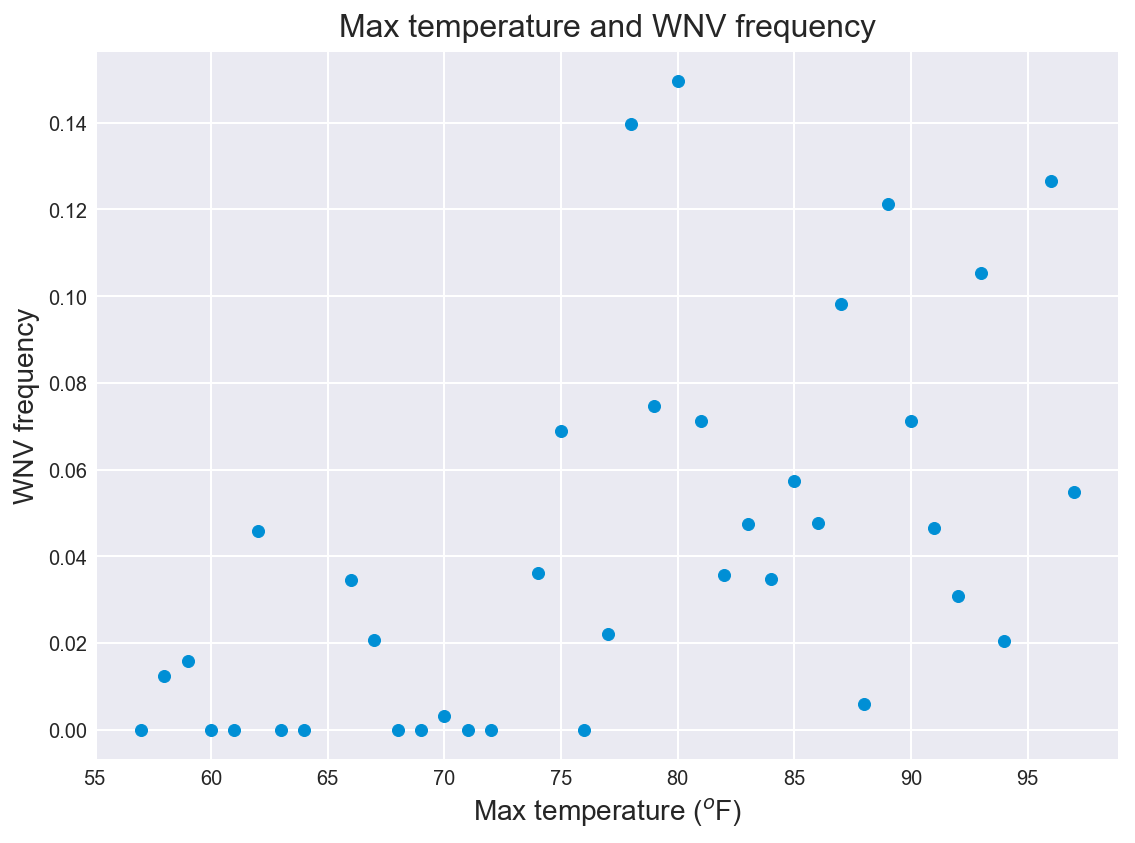

In [35]:
tmax_list = []
for i in list(set(train.Tmax.values)):
    tmax_list.append(train[train.Tmax == i]['WnvPresent'].mean())

plt.figure(figsize=(8, 6))
plt.scatter(list(set(train.Tmax.values)), tmax_list)
plt.xlabel('Max temperature ($^o$F)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Max temperature and WNV frequency', size=16)
plt.tight_layout()

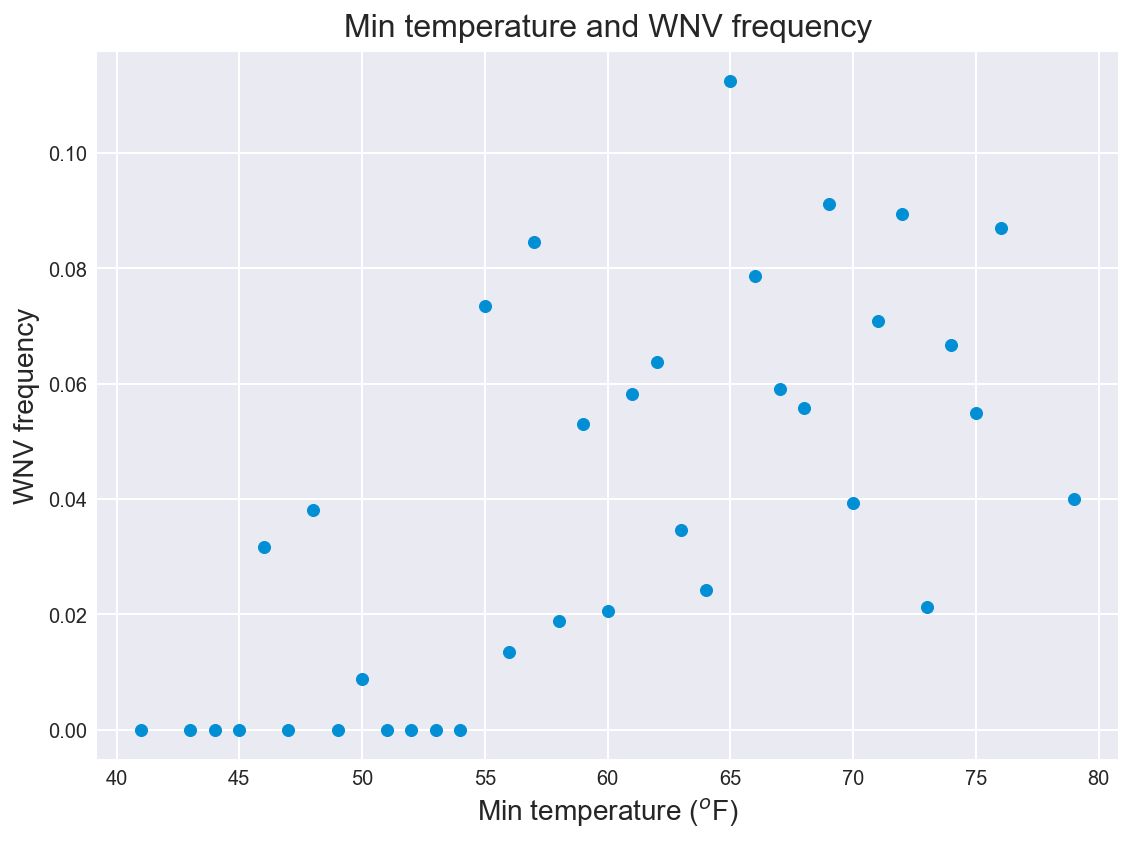

In [36]:
tmin_list = []
for i in list(set(train.Tmin.values)):
    tmin_list.append(train[train.Tmin == i]['WnvPresent'].mean())

plt.figure(figsize=(8, 6))
plt.scatter(list(set(train.Tmin.values)), tmin_list)
plt.xlabel('Min temperature ($^o$F)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Min temperature and WNV frequency', size=16)
plt.tight_layout()


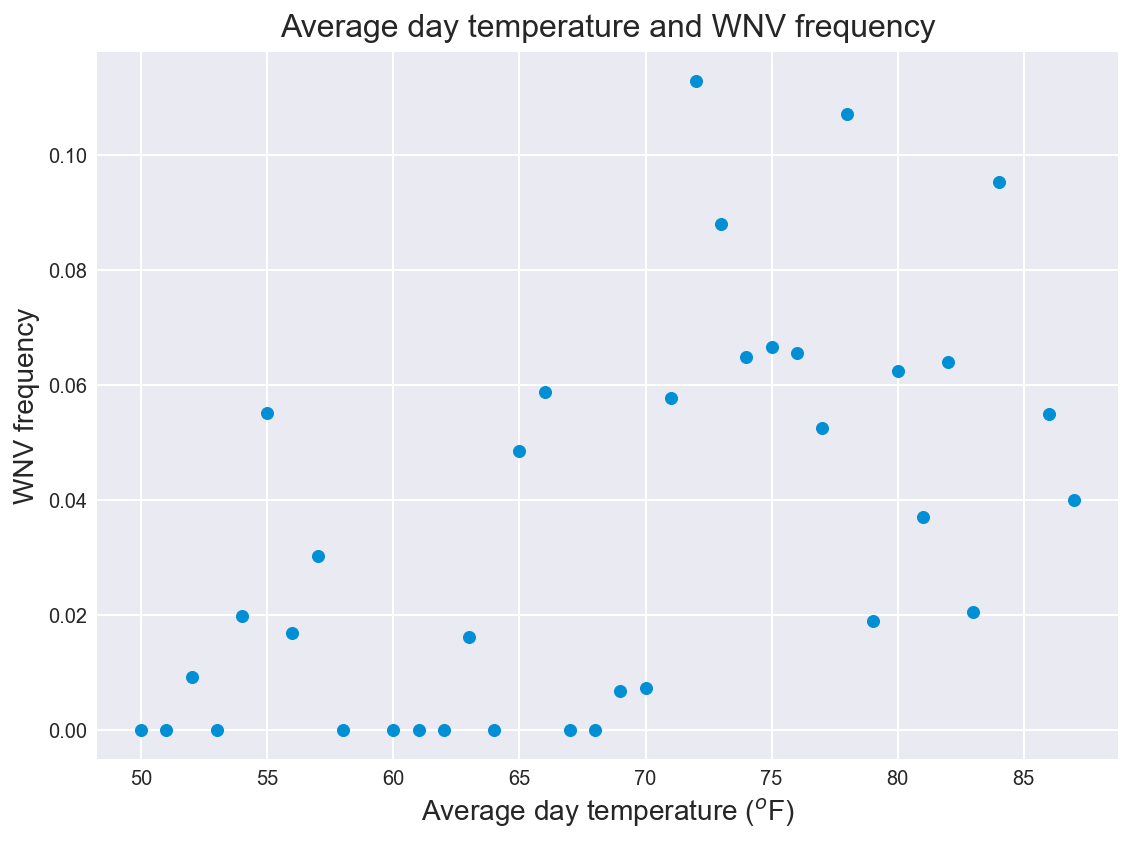

In [37]:
tavg_list = []
for i in list(set(train.Tavg.values)):
    tavg_list.append(train[train.Tavg == i]['WnvPresent'].mean())

plt.figure(figsize=(8, 6))
plt.scatter(list(set(train.Tavg.values)), tavg_list)
plt.xlabel('Average day temperature ($^o$F)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Average day temperature and WNV frequency', size=16)
plt.tight_layout()

#### PrecipTotal
Data shows high WNV frequency at low precipitation

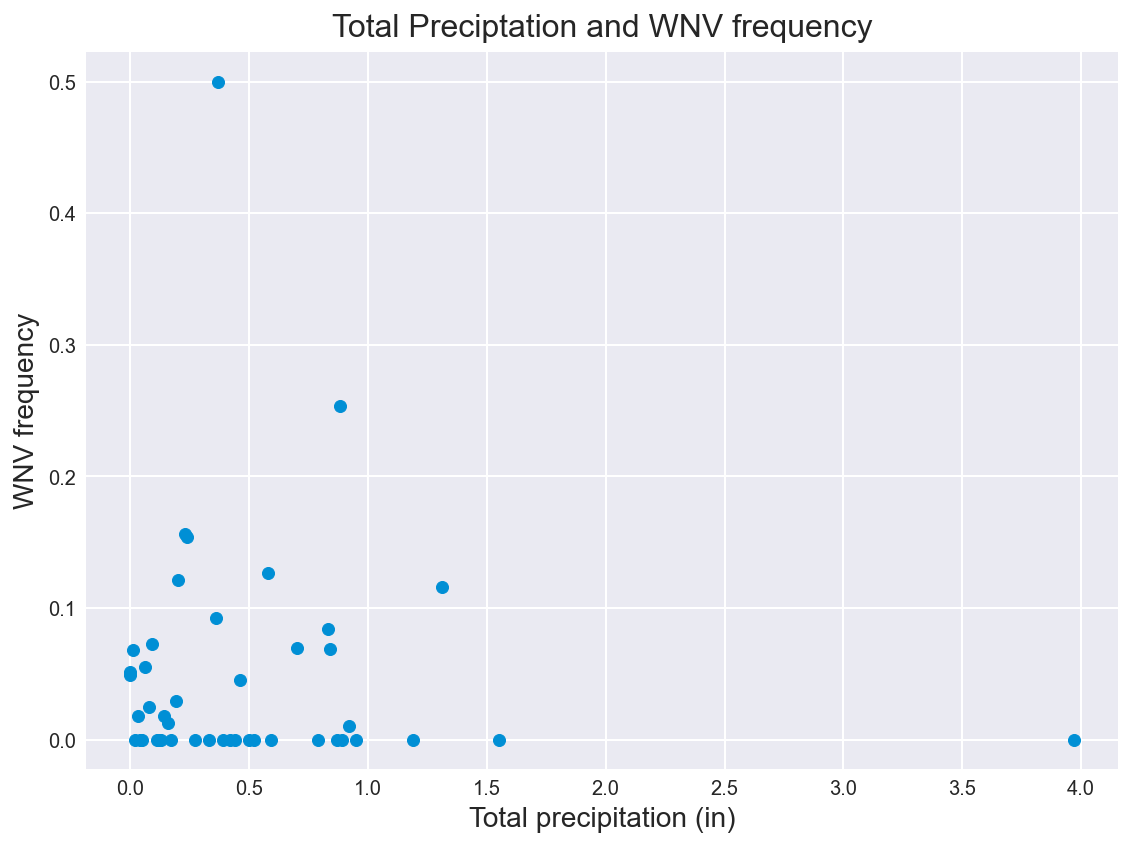

In [38]:
precip_list = []
for i in list(set(train.PrecipTotal.values)):
    precip_list.append(train[train.PrecipTotal == i]['WnvPresent'].mean())

plt.figure(figsize=(8, 6))
plt.scatter(list(set(train.PrecipTotal.values)), precip_list)
plt.xlabel('Total precipitation (in)', size=14)
plt.ylabel('WNV frequency', size=14)
plt.title('Total Preciptation and WNV frequency', size=16)
plt.tight_layout()

In [39]:
# Save train data to to csv file
train.to_csv('../dataset/train_merged.csv', index = False)

## Feature Engineering & Feature Selection<a class="anchor" id="chapter3"></a>

**1. Parsed dates into year (performed on top for EDA), month and week of year.**<br>
**2. Merged weather dataset to train and test set for modeling on Date and Station.**<br>
**3. Train and Test dataset features to be identical.**<br>
**4. Correlation of Features to Target were calculated and omitted features that are not correlated.**<br>
**4. Spray set is omitted for now due to the lack of information over the years.**

### Parse Dates<a class="anchor" id="chapter3_1"></a>
Parsed dates into year (performed on top for EDA), month and week of year and turn each as features.

In [40]:
# make datetime columns for both train and test set
train['Month'] = train['Date'].apply(lambda x:x.month)
train['WeekofYear'] = train['Date'].apply(lambda x:x.weekofyear)

test['Month'] = test['Date'].apply(lambda x:x.month)
test['WeekofYear'] = test['Date'].apply(lambda x:x.weekofyear)

In [41]:
#Check Train shape
train.shape

(9693, 51)

#### Merge Test with Weather

In [42]:
#Check Test columns and dtypes.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    116293 non-null  datetime64[ns]
 1   Street                  116293 non-null  object        
 2   Trap                    116293 non-null  object        
 3   Latitude                116293 non-null  float64       
 4   Longitude               116293 non-null  float64       
 5   CULEX ERRATICUS         116293 non-null  int64         
 6   CULEX PIPIENS           116293 non-null  int64         
 7   CULEX PIPIENS/RESTUANS  116293 non-null  int64         
 8   CULEX RESTUANS          116293 non-null  int64         
 9   CULEX SALINARIUS        116293 non-null  int64         
 10  CULEX TARSALIS          116293 non-null  int64         
 11  CULEX TERRITANS         116293 non-null  int64         
 12  UNSPECIFIED CULEX       116293

In [43]:
#Check test shape before merging with weather
test.shape

(116293, 17)

In [44]:
#Merge Test with Weather
test = test.merge(weather, on = ['Date','Station'])

In [45]:
#Check test shape after merging with weather
test.shape

(116293, 49)

### Make Train and Test Features Identical<a class="anchor" id="chapter3_2"></a>

In [46]:
#Check difference train and test columns
set(train.columns).difference(test.columns)

{'NumMosquitos', 'Species', 'WnvPresent'}

In [47]:
#Check difference test and train columns
set(test.columns).difference(train.columns)

{'UNSPECIFIED CULEX'}

In [48]:
#Drop the 2 columns from train that test misses.
train = train.drop(columns = ['NumMosquitos','Species'])

In [49]:
#Create the column that train misses but test has.
train['UNSPECIFIED CULEX'] = 0

### Correlation of Features to Target<a class="anchor" id="chapter3_3"></a>
Correlation of Features to Target were calculated and omitted features that are not correlated.

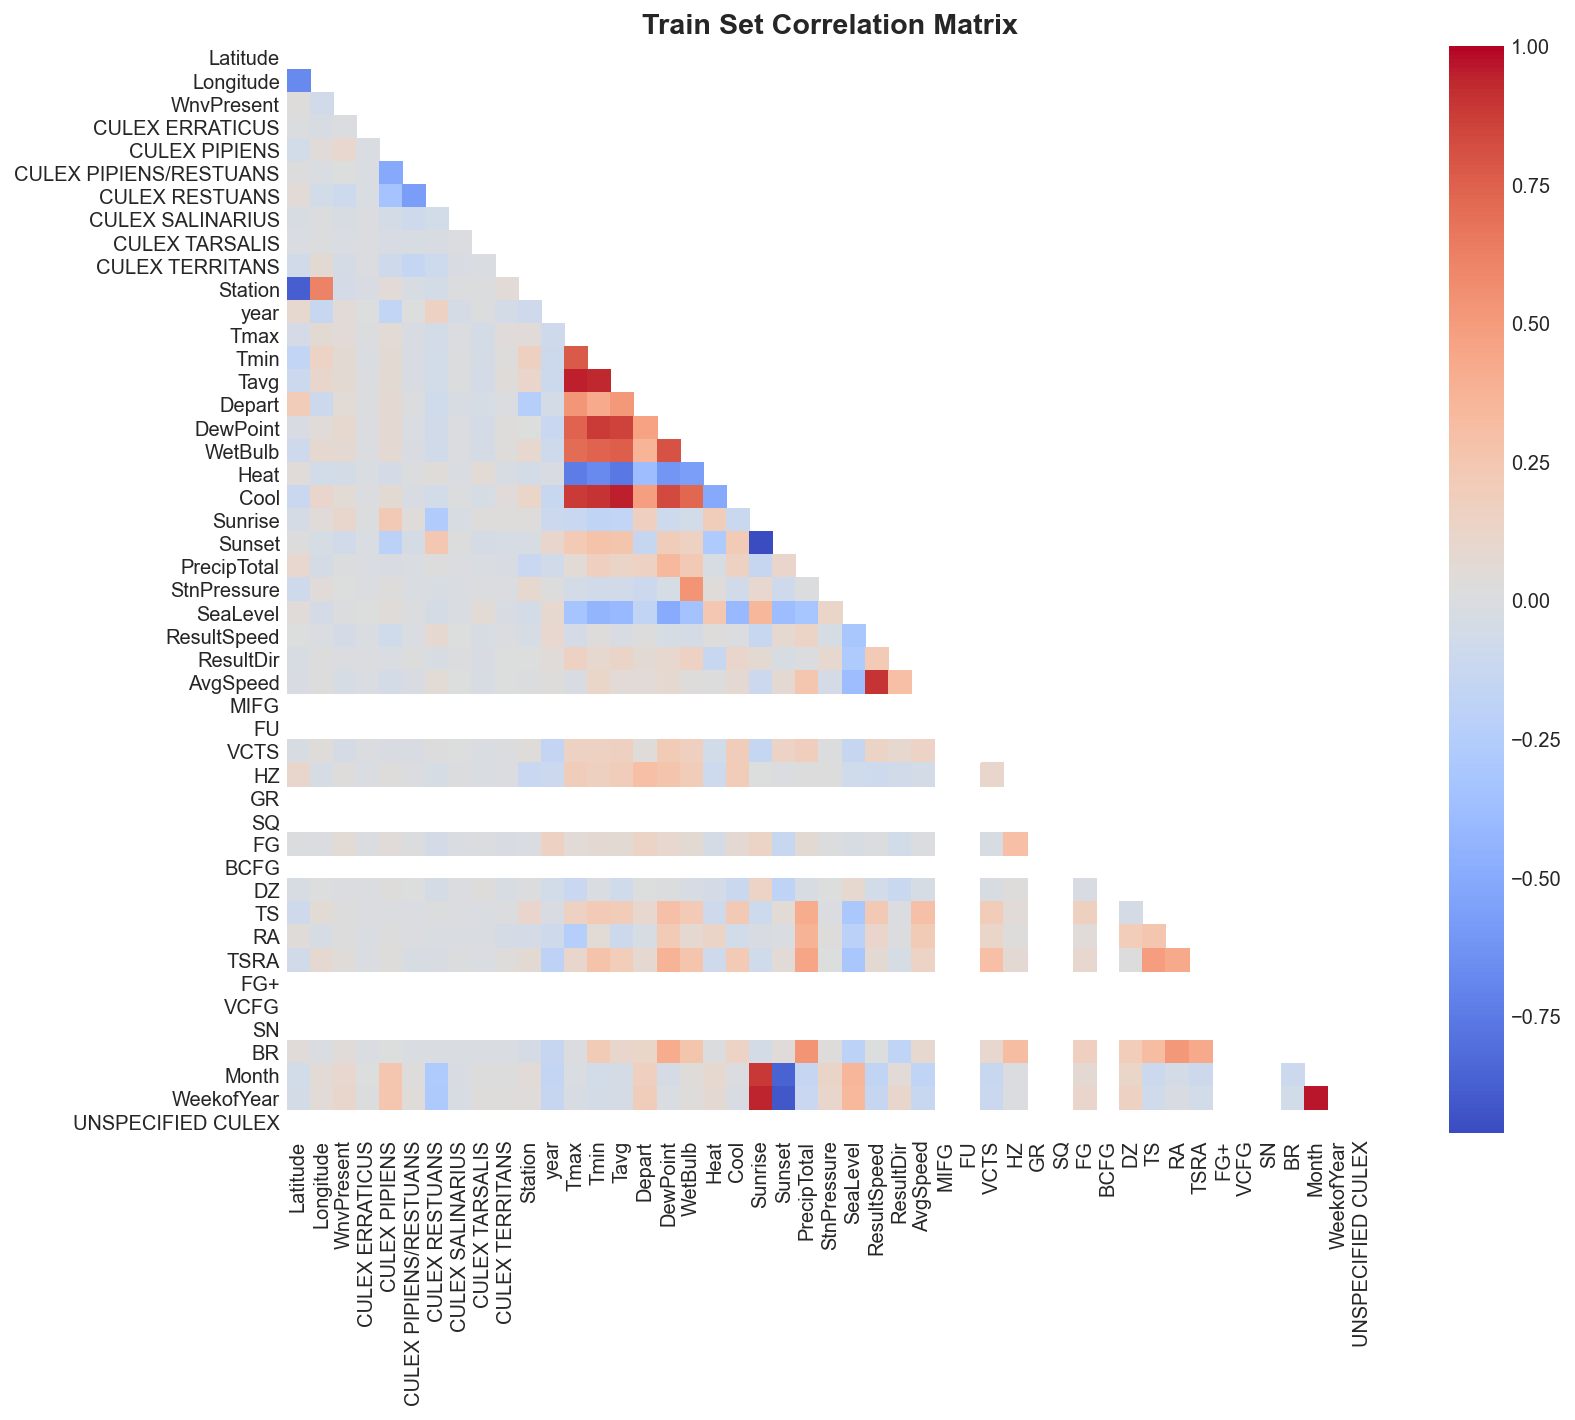

In [50]:
# let's see how correlation looks like for train set
def find_correlation(data,title):
    correlation = data.corr()
    mask = np.zeros_like(correlation)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(12, 10))
        ax = sns.heatmap(correlation, mask=mask, vmax=1, square=True, cmap= "coolwarm") 
    plt.title(title, weight = 'bold')

find_correlation(train, 'Train Set Correlation Matrix')

In [51]:
#Sort features by correlation.
abs(train.corr()["WnvPresent"]).sort_values(ascending=False)

WnvPresent                1.000000
WeekofYear                0.104807
Sunrise                   0.103941
CULEX PIPIENS             0.101319
Month                     0.101115
CULEX RESTUANS            0.093323
DewPoint                  0.089241
WetBulb                   0.079304
Tmin                      0.072696
Longitude                 0.068600
Sunset                    0.067079
Tavg                      0.066863
Depart                    0.064855
Cool                      0.060922
FG                        0.058856
Heat                      0.055554
year                      0.053875
Tmax                      0.052819
BR                        0.049740
ResultSpeed               0.046820
Station                   0.044195
TSRA                      0.038678
VCTS                      0.036467
CULEX TERRITANS           0.035736
Latitude                  0.033330
AvgSpeed                  0.031732
HZ                        0.028804
RA                        0.025523
TS                  

#### Save Train and Test with Correlated Features Only

In [52]:
#Select correlated columns for train.
cols_train=abs(train.corr()["WnvPresent"]).sort_values(ascending=False).round(4).index[0:39]
cols_train

Index(['WnvPresent', 'WeekofYear', 'Sunrise', 'CULEX PIPIENS', 'Month',
       'CULEX RESTUANS', 'DewPoint', 'WetBulb', 'Tmin', 'Longitude', 'Sunset',
       'Tavg', 'Depart', 'Cool', 'FG', 'Heat', 'year', 'Tmax', 'BR',
       'ResultSpeed', 'Station', 'TSRA', 'VCTS', 'CULEX TERRITANS', 'Latitude',
       'AvgSpeed', 'HZ', 'RA', 'TS', 'CULEX SALINARIUS', 'StnPressure',
       'CULEX PIPIENS/RESTUANS', 'SeaLevel', 'CULEX TARSALIS', 'PrecipTotal',
       'ResultDir', 'DZ', 'CULEX ERRATICUS', 'MIFG'],
      dtype='object')

In [53]:
#Save train with correlated features only.
train = train[cols_train]

In [54]:
#Select correlated columns for test.
cols_test=abs(train.corr()["WnvPresent"]).sort_values(ascending=False).round(4).index[1:39]
cols_test

Index(['WeekofYear', 'Sunrise', 'CULEX PIPIENS', 'Month', 'CULEX RESTUANS',
       'DewPoint', 'WetBulb', 'Tmin', 'Longitude', 'Sunset', 'Tavg', 'Depart',
       'Cool', 'FG', 'Heat', 'year', 'Tmax', 'BR', 'ResultSpeed', 'Station',
       'TSRA', 'VCTS', 'CULEX TERRITANS', 'Latitude', 'AvgSpeed', 'HZ', 'RA',
       'TS', 'CULEX SALINARIUS', 'StnPressure', 'CULEX PIPIENS/RESTUANS',
       'SeaLevel', 'CULEX TARSALIS', 'PrecipTotal', 'ResultDir', 'DZ',
       'CULEX ERRATICUS', 'MIFG'],
      dtype='object')

In [55]:
#Save test with correlated features only.
test = test[cols_test]

In [56]:
#Export clean train/test dataset
train.to_csv("../dataset/train_merged.csv", index = False)
test.to_csv("../dataset/test_merged.csv", index = False)